In [125]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# 绘图
'''
X = [[1,2], 输入数据
    [3,4],
    [5,6]]
y = [1,2,3] 标签值
y2 = pred_fn(X) 估计值
'''
def plot_decision_boundary(X, y, fnn):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    ds=SupervisedDataSet(2,1)
    for x in np.c_[xx.ravel(), yy.ravel()]:
        ds.addSample(x, [0,])
    Z = fnn.activateOnDataset(ds)
    if Z.shape[1] == 2:
        Z = Z[:,0].ravel() / (Z[:,1].ravel() + Z[:,0].ravel())
    print xx.shape, Z.shape
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cbar = plt.gcf().colorbar(cs)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

def normalize(x):
    xmin = x.min()
    return (x - xmin) * 1.0 / (x.max() - xmin)



In [3]:
# 黑盒优化
def objF(x): return sum(x**2+x**4)
x0 = np.array([2.1, -100])

from pybrain.optimization import CMAES
l = CMAES(objF, x0, minimize=True)
l.maxEvaluations = 8000
res, fitness = l.learn()
print res, objF(res), fitness


[  8.64296512e-127   1.18075015e-126] 2.14117938752e-252 2.14117938752e-252


In [169]:
import numpy as np  
from pybrain.datasets import SupervisedDataSet  
from pybrain.supervised.trainers import BackpropTrainer  
from pybrain.tools.shortcuts import buildNetwork  
from pybrain.structure.modules import TanhLayer  

# 准备数据
C = 400
X = np.linspace(0,np.pi*4,C)
Y= np.random.uniform(-1, 1, C) #第二个自变量向量
label= Y > np.cos(X)#因变量

train= normalize(X) #第一个自变量向量  
train2 = normalize(Y)
label = normalize(label)

ds=SupervisedDataSet(2,1)
for i in range(len(train)):
    ds.addSample([train[i], train2[i]],[label[i]])

# 创建并训练神经网络
# hidden_layer都是100个神经元就可以分出来，200个就不行了，不知道为什么！
fnn=buildNetwork(2,100,100,1,bias=True)#第一个2是输入层的数据元（简单理解为有几个变量吧),第四个1是输出层的数据元（简单理解为因变量的个数）  
trainer=BackpropTrainer(fnn,ds,momentum=0.5, verbose=True,learningrate=0.1)  
trainer.trainEpochs(epochs=500)#迭代次数  

X = np.hstack([train.reshape(train.shape[0], 1), train2.reshape(train.shape[0], 1)])
plot_decision_boundary(X, label, fnn)
plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


Total error: 45.8752639014
Total error: 0.506282703338
Total error: 0.454396506503
Total error: 0.44912036226
Total error: 0.466825313051
Total error: 0.476441452188
Total error: 0.468269417267
Total error: 0.420914145569
Total error: 0.452611924545
Total error: 0.390250781604
Total error: 0.408949240616
Total error: 0.405872654642
Total error: 0.360981555534
Total error: 0.390902205263
Total error: 0.391112325959
Total error: 0.359640425353
Total error: 0.336498374746
Total error: 0.359009526774
Total error: 0.319312470784
Total error: 0.368575338942
Total error: 0.330807656177
Total error: 0.324804852856
Total error: 0.325803807925
Total error: 0.380986656197
Total error: 0.342829922837
Total error: 0.335168175539
Total error: 0.325891259668
Total error: 0.349646065505
Total error: 0.324912167846
Total error: 0.37810637479
Total error: 0.335107797379
Total error: 0.344060229801
Total error: 0.342567353347
Total error: 0.342476033118
Total error: 0.334078106665
Total error: 0.33785247

KeyboardInterrupt: 

Total error: 0.626951241247
Total error: 0.215850623738
Total error: 0.223165193004
Total error: 0.204494623648
Total error: 0.177473905365
Total error: 0.186633445887
Total error: 0.164551586948
Total error: 0.156963015022
Total error: 0.156037072696
Total error: 0.144827027915
Total error: 0.13546050592
Total error: 0.13835639353
Total error: 0.129643587538
Total error: 0.119708976906
Total error: 0.126161663228
Total error: 0.10786588458
Total error: 0.115033111893
Total error: 0.113761423675
Total error: 0.103490480865
Total error: 0.110560849596
Total error: 0.105564037558
Total error: 0.10460372409
Total error: 0.101660928351
Total error: 0.101074515336
Total error: 0.100264760131
Total error: 0.0962825510546
Total error: 0.0911385552946
Total error: 0.0948093960869
Total error: 0.0951329444586
Total error: 0.0940093503574
Total error: 0.0924445320623
Total error: 0.0900049365341
Total error: 0.0883173952271
Total error: 0.0794902722759
Total error: 0.0912299149771
Total error: 0

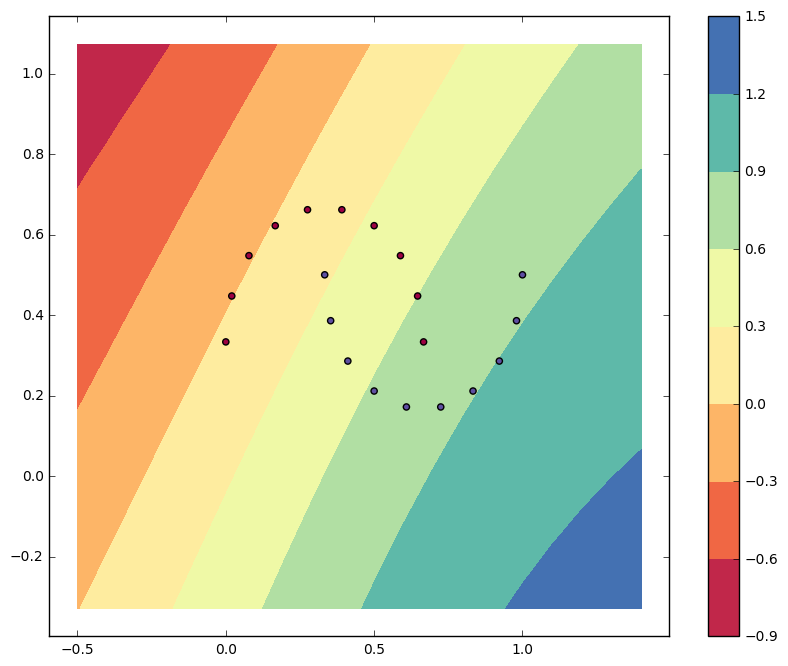

In [187]:

from pybrain.datasets import SupervisedDataSet 

# 创建并训练神经网络
fnn=buildNetwork(2,30,1,bias=True)#第一个2是输入层的数据元（简单理解为有几个变量吧),第四个1是输出层的数据元（简单理解为因变量的个数）  

X, y = sklearn.datasets.make_moons(20, noise=None)
C = 1000
X = normalize(np.array(X[:C]))
y = normalize(np.array(y[:C]))
ds = SupervisedDataSet(2, 1)
for i in range(len(y)):
    ds.addSample(X[i,:], [y[i]])
trainer=BackpropTrainer(fnn,ds,momentum=0.01, verbose=True,learningrate=0.01)  
for i in range(60):
    trainer.train()
#trainer.trainUntilConvergence(maxEpochs=200)#迭代次数

print fnn.activate(X[0]), y[0]

plot_decision_boundary(X, y, fnn)
plt.show()

In [171]:
# python 2.6
from pybrain.datasets import SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
import random

ds = SupervisedDataSet(2, 1)
ds.addSample((1,0),(1,))
ds.addSample((1,1),(0,))
ds.addSample((0,0),(0,))
ds.addSample((0,1),(1,))
net = buildNetwork(2, 4, 1)

trainer = BackpropTrainer(net, ds, momentum=0.99, learningrate=0.01)
for i in range(1000):
    trainer.train()

for input, target in ds:
    print input, target, net.activate(input)

[ 1.  0.] [ 1.] [ 1.00014149]
[ 1.  1.] [ 0.] [ 0.0012661]
[ 0.  0.] [ 0.] [ 0.00048662]
[ 0.  1.] [ 1.] [ 1.00001548]


In [153]:
###
# xor.py
#
# author: Kristina Striegnitz
#
# version: 3/3/2010
#
# Simple example of training a neural network calculating XOR using
# the pybrain package.
###
from pybrain.datasets import SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised import BackpropTrainer


def make_dataset():
    """
    Creates a set of training data.
    """
    data = SupervisedDataSet(2,1)

    data.addSample([1,1],[0])
    data.addSample([1,0],[1])
    data.addSample([0,1],[1])
    data.addSample([0,0],[0])

    return data


def training(d):
    """
    Builds a network and trains it.
    """
    n = buildNetwork(d.indim, 4, d.outdim,recurrent=True)
    t = BackpropTrainer(n, d, learningrate = 0.01, momentum = 0.99, verbose = True)
    for epoch in range(0,1000):
        t.train()
    return t


def test(trained):
    """
    Builds a new test dataset and tests the trained network on it.
    """
    testdata = SupervisedDataSet(2,1)
    testdata.addSample([1,1],[0])
    testdata.addSample([1,0],[1])
    testdata.addSample([0,1],[1])
    testdata.addSample([0,0],[0])
    trained.testOnData(testdata, verbose= True)


def run():
    """
    Use this function to run build, train, and test your neural network.
    """
    trainingdata = make_dataset()
    trained = training(trainingdata)
    test(trained)

run()

Total error: 0.807365159026
Total error: 0.576085091328
Total error: 0.299985003109
Total error: 0.295826582204
Total error: 0.42942306231
Total error: 0.612697807875
Total error: 0.624848161712
Total error: 0.423137762671
Total error: 0.247607545345
Total error: 0.137518187661
Total error: 0.201470522825
Total error: 0.369070157651
Total error: 0.436078581628
Total error: 0.419968641715
Total error: 0.304452981395
Total error: 0.199482609215
Total error: 0.152684717046
Total error: 0.169336922979
Total error: 0.241481540619
Total error: 0.320665539103
Total error: 0.32684901374
Total error: 0.268482355925
Total error: 0.205734176119
Total error: 0.174216309364
Total error: 0.111545050563
Total error: 0.161741682975
Total error: 0.236737114987
Total error: 0.284588942542
Total error: 0.268918831267
Total error: 0.217611270776
Total error: 0.166723099645
Total error: 0.151896452862
Total error: 0.127404940314
Total error: 0.164209373705
Total error: 0.212641573474
Total error: 0.2276186